<a href="https://colab.research.google.com/github/kajus9138/OR/blob/main/Atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados base "flight.csv"  

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import KFold, cross_validate
import pickle
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import GridSearchCV


# Análise geral


In [4]:
dados = pd.read_csv('/content/flights.csv')
dados

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [5]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
dados.describe(include='O')  # Estatística descritivas para as variáveis do tipo “object”


,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Com a importação da base no dataframe podemos notar que se trata de uma base com dados de voo de um aeroporto,do ano de 2010 até o ano de 2022. Ao todo são 71175 registros com 11 atributos. A coluna delay refere-se a atraso dos voos em segundos.

# Analisando atrasos
Agrupamos os atrasos, em média, pelas compahias aéreas. Em seguida analisamos quantos voos são efetuados por estas mesmas companhias.

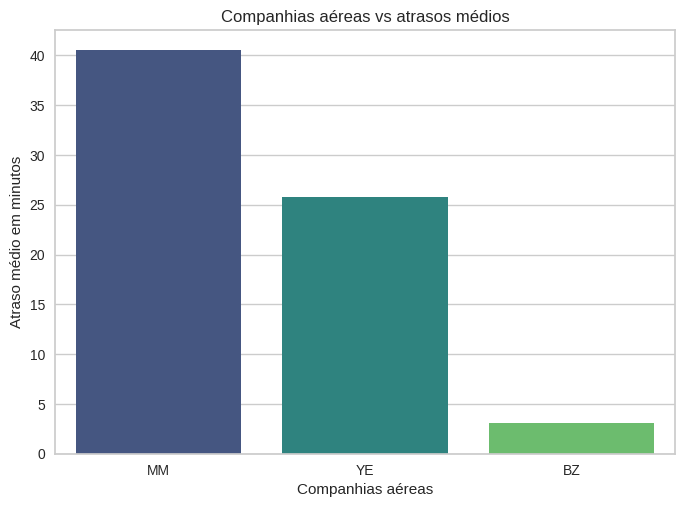

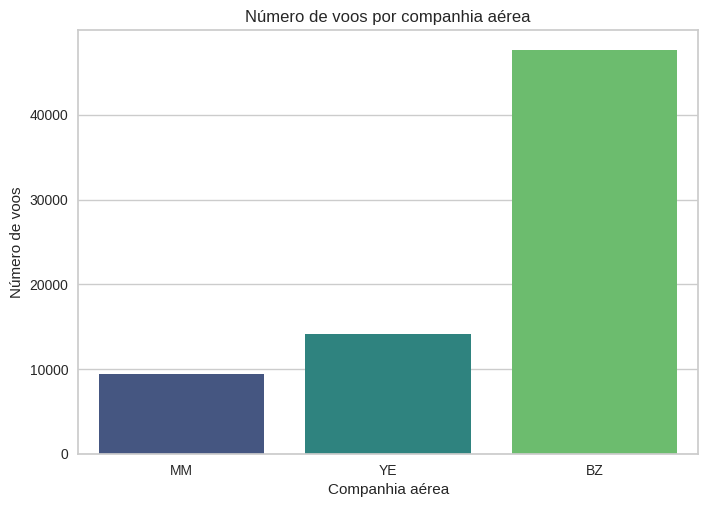

In [8]:
# Calcular a média do atraso para cada companhia aérea
average_delay_airline = dados.groupby('airline')['delay'].mean().reset_index()

# Ordenar os dados pela média do atraso
average_delay_airline = average_delay_airline.sort_values(by='delay', ascending=False)

# Criar uma paleta de cores com base na ordem das companhias aéreas
palette_airline = sns.color_palette("viridis", n_colors=len(average_delay_airline))

# Gráfico de barras para atrasos médios por companhia aérea
sns.barplot(x='airline', y='delay', data=average_delay_airline, palette=palette_airline)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico de contagem com base na ordem das companhias aéreas
sns.countplot(data=dados, x='airline', order=average_delay_airline['airline'], palette=palette_airline)
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()


Com estes dois gráficos acima, podemos notar que a companhia aérea MM é a que possuí, em média, o maior atraso. Mesmo sendo a companhia com menor número de vôos.

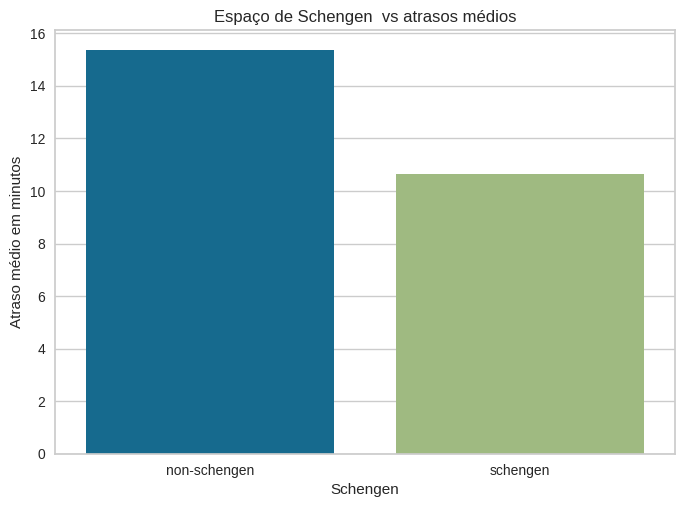

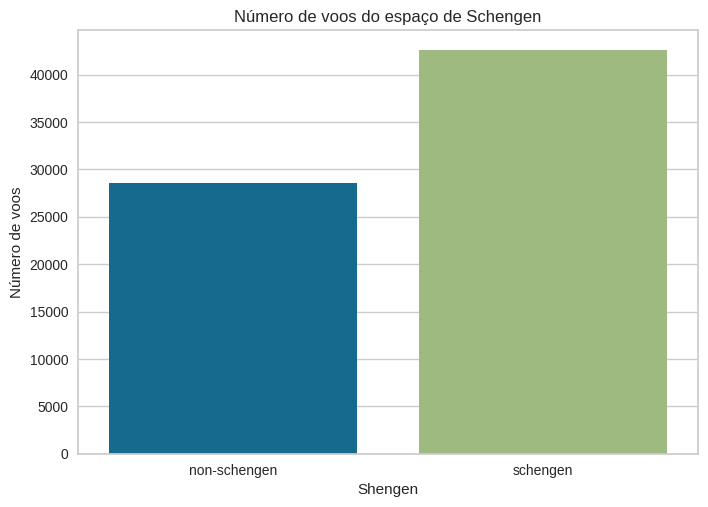

In [9]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index() #agrupa as companhias aéreas ("airline") pelo atraso ["delay"] médio .mean()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Espaço de Schengen  vs atrasos médios')
plt.xlabel('Schengen')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos do espaço de Schengen')
plt.xlabel('Shengen')
plt.ylabel('Número de voos')
plt.show()


Com estes dois gráficos, nota-se que o maior número de atrasos são de voôs que não são do espaço schengen, mesmo que a quantidade deste tipo de vôos ser menor.

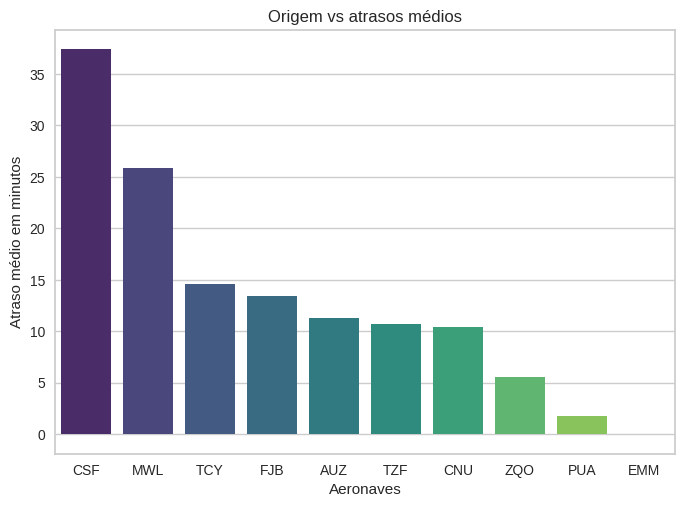

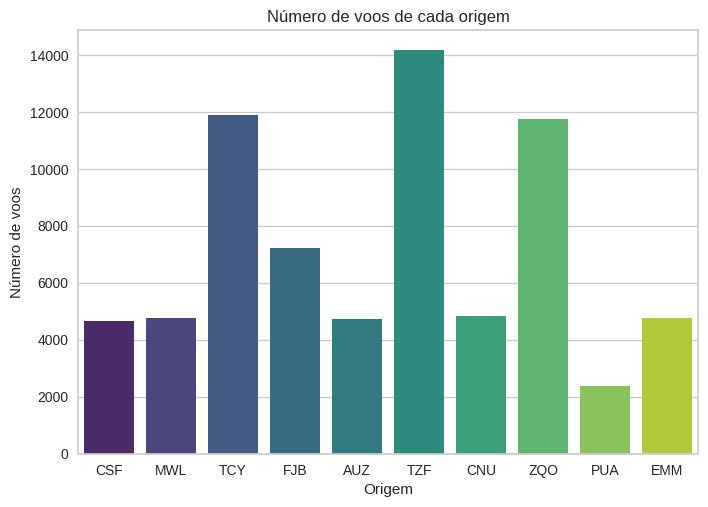

In [10]:
average_delay = dados.groupby('origin')['delay'].mean().reset_index()

# Ordenar os dados pela média do atraso
average_delay = average_delay.sort_values(by='delay', ascending=False)

# Criar uma paleta de cores com base na ordem das origens
palette = sns.color_palette("viridis", n_colors=len(average_delay))

# Gráfico de barras para atrasos médios
sns.barplot(x='origin', y='delay', data=average_delay, palette=palette)
plt.title('Origem vs atrasos médios')
plt.xlabel('Aeronaves')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico de contagem com base na ordem das origens
sns.countplot(data=dados, x='origin', order=average_delay['origin'], palette=palette)
plt.title('Número de voos de cada origem')
plt.xlabel('Origem')
plt.ylabel('Número de voos')
plt.show()


As origens com maiores atrasos, CSF e MWL, são origens com menores quantidades de vôos, quando comparadas com as outras origens

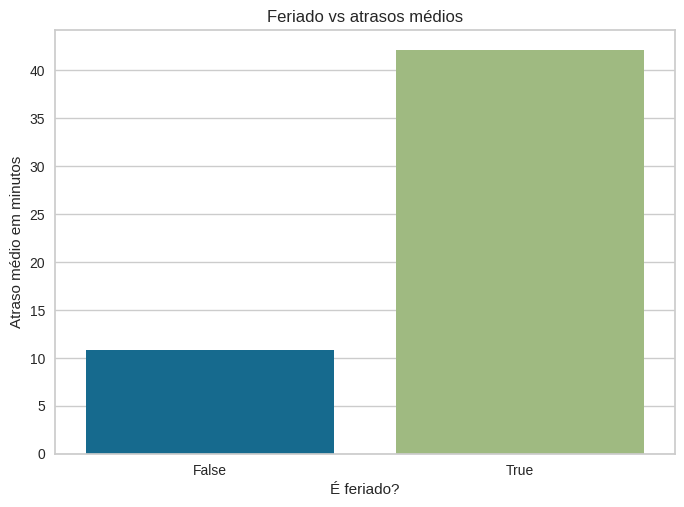

In [11]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()


Com o gréfico acima, nota-se que o fato de ser feriado impacta muito na média dos atrasos.

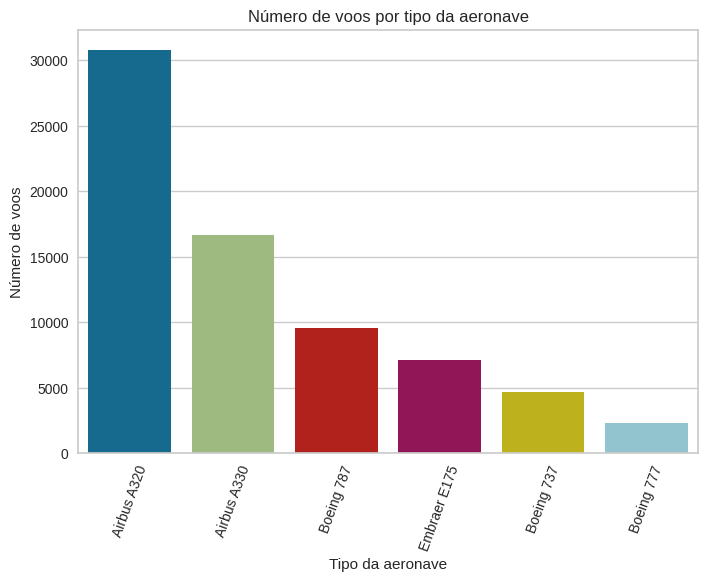

In [12]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()


De forma resumida, podemos concluir que o fato do vôos ser em um feriado impacta consideravelmente em se ter atrasos. Caso o vôo seja da compahia MM a chance de se ter uma atraso também é considerável, uma vez que é a companhia com menor quantidade de vôos e com maior taxa de atrasos.

# Analisando as distribuições

In [13]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin


<Axes: xlabel='arrival_time', ylabel='Count'>

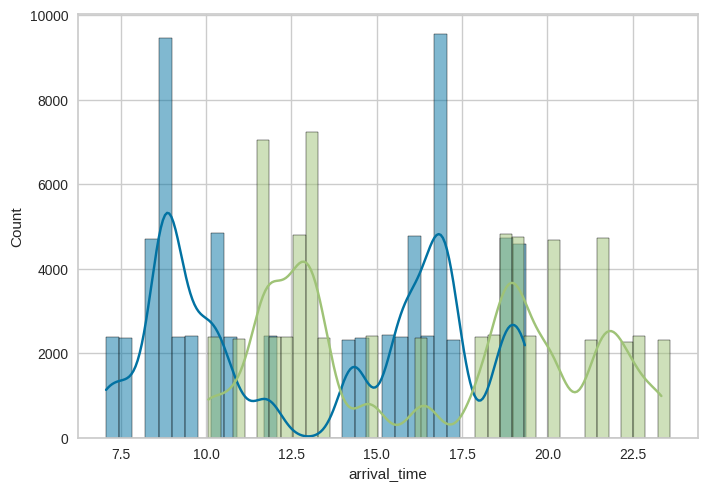

In [14]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)


Após um pico de chagada há um pico de saídas.

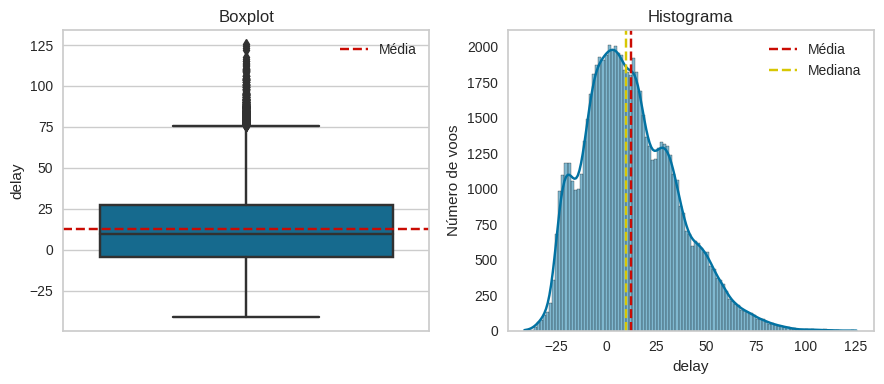

In [15]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()
largura_bin_delay = calcular_largura_bin(dados, 'delay')


fig, axes = plt.subplots(1, 2, figsize=(9, 4)) # 1 linha e duas colunas

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média') #axhline plota linha horizontal
axes[0].legend()

#largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média') #axvline plota linha vertical
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()


In [16]:
mean_delay

12.548378015698628

In [17]:
median_delay

9.740453855590491

A média de atrasos é de 12 minutos. As distribuições ilustram que há uma maior concentração de atrasos até 25 minutos. A assimetria da distribuição (calda mais longa a direita), indica que há mais atrasos que adiantamentos.

# Engenharia de características

Nesta etapa as variáveis categóricas são tratadas para o posterior uso para treinamentos de modelo.

In [18]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados['day_name'] = dados['date'].dt.day_name()
# Transforma o padrão do dia da semana do dataframe (categorias: day e year) em uma
# única categoria com o nome do dia da semana (Friday por exemplo).

In [19]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
# Tratamento das variáveis categóricas binárias.

In [20]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
# Tratamento das demais variáveis categóricas


In [21]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
# Remoção das categorias irrelevantes

In [22]:
df_clean.head(2)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0


Note que com os processamentos, passamos a ter 31 categorias.

# Treinamento de modelos

## Dummy Regressor

Utilizamos o Dummy Regressor apenas para termos um baseline de resultados para comparação. A complexidade deste modelo é baixa. Quando a estratégia é definida como média (mean), por exemplo, todos as predições são preenchidas com a média do conjunto de treinamento. O mesmo se aplica as outras estratégias.

In [23]:
def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

# Função definida para facilitar o cálculo do rmse, mae e r2 de cada modelo.

In [24]:
X = df_clean.drop(['delay'], axis = 1)
y = df_clean['delay']
#X.head(1)
#y.head(1)

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

# Criação dos modelos com as diferentes estratégias.

Estratégia: mean
Raiz do Erro Quadrático Médio: 23.2241
Erro Absoluto Médio: 18.6127
R2 Score: -0.0


Estratégia: median
Raiz do Erro Quadrático Médio: 23.4038
Erro Absoluto Médio: 18.4891
R2 Score: -0.0155


Estratégia: quantile
Raiz do Erro Quadrático Médio: 28.7943
Erro Absoluto Médio: 22.0382
R2 Score: -0.5372


Estratégia: constant
Raiz do Erro Quadrático Médio: 23.3699
Erro Absoluto Médio: 18.4893
R2 Score: -0.0126




## Random Forest

Treinamento de modelos com Random Forest Regressor.

In [27]:
model_rf = RandomForestRegressor(max_depth=15, n_estimators= 15)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
metricas = calcular_metricas_regressao(y_test, y_pred_rf)
print(metricas)

{'Raiz do Erro Quadrático Médio': 13.2426, 'Erro Absoluto Médio': 10.6034, 'R2 Score': 0.6749}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


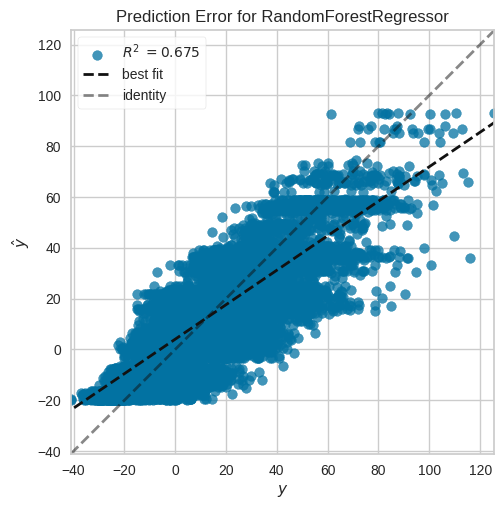

In [28]:
visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


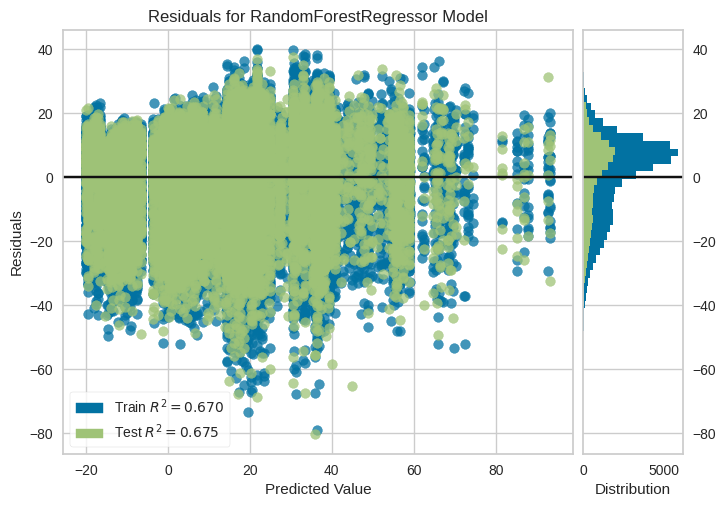

In [29]:
viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

In [30]:
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

# Treinamento com cross validation para avaliar a robustez do modelo

MAE Scores: ['-10.643', '-10.917', '-10.668', '-10.739', '-10.779']
MAE Média: -10.749, Std: 0.097
----------------------------------------------------------------
RMSE Scores: ['-13.226', '-13.569', '-13.314', '-13.398', '-13.436']
RMSE Média: -13.388, Std: 0.116
----------------------------------------------------------------
R2 Scores: ['0.674', '0.650', '0.670', '0.665', '0.660']
R2 Média: 0.664, Std: 0.008
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


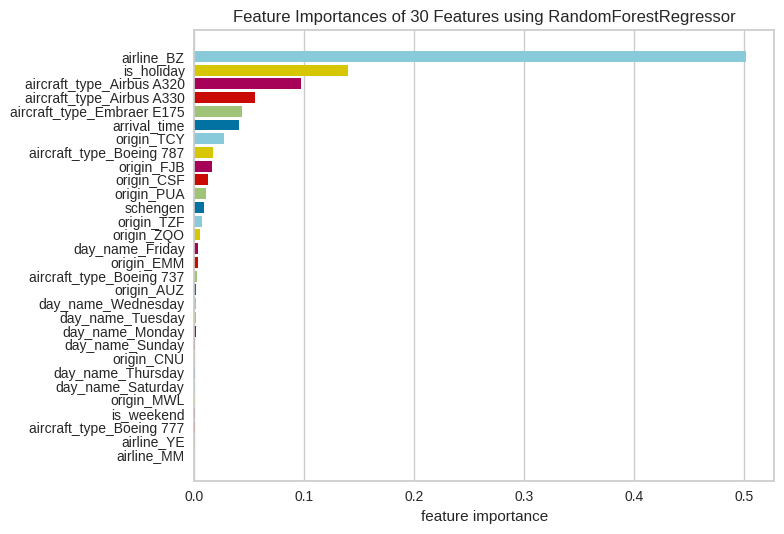

<Axes: title={'center': 'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [38]:
viz = FeatureImportances(model_rf, relative=False)
viz.fit(X_train, y_train)
viz.show()

# Visualização das features mais importantes para os resultados do modelo.


In [40]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

# Visualização das features mais importantes em um dataframe


,Features,Importances
4,airline_BZ,0.502045
2,is_holiday,0.140094
7,aircraft_type_Airbus A320,0.096960
8,aircraft_type_Airbus A330,0.054717
12,aircraft_type_Embraer E175,0.043696
1,arrival_time,0.040908
20,origin_TCY,0.026751
11,aircraft_type_Boeing 787,0.017087
17,origin_FJB,0.015730
15,origin_CSF,0.012107


Visto que as primeiras features tem importancia muito maior, testamos o desempenho dos modelos com as 10 primeiras features até as 15 primeiras. Com esta análise verificamos se há muita variação nos resultados.

In [50]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df


,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


Notamos que após as 13 primeiras features a variação dos indicadores: RMSE, MAE e R2 tem baixíssima variação, ou não varia. Portanto, treinaremos o modelo com as 13 primeiras features.

In [51]:
selected_features = feature_importances['Features'].values[:13]
X_select_features = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)


Realizamos o grid search para encontrarmos a melhor configuração de parâmetros.

In [52]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [50,100, 150, 200]
 }


In [55]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [56]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

Uma vez encontrada a melhor configuração, o modelo é salvo.

In [57]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


# Teste de carregamento do modelo

In [59]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [60]:
file_path = '/content/model_producao.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("Modelo carregado com sucesso!")
except Exception as e:
    print("Ocorreu um erro ao carregar o modelo:", str(e))

Modelo carregado com sucesso!


In [66]:
y_predict = model.predict([nova_amostra])[0]
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


36.740529995725694

36.740529995725694